# LEVEL 2 (Intermediate)

## Task 1: Regression Analysis

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df=pd.read_csv("Stock Prices Data Set.csv")

In [5]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [10]:
df.shape

(497461, 7)

In [6]:
df=df.dropna(subset=["open","high","low"])

In [7]:
X=df[["open","high","low","volume"]]
y=df["close"]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.head()

,open,high,low,volume
120351,59.90,61.480,59.6976,512554
195194,184.66,184.660,183.0300,249751
349126,25.40,25.475,24.4750,1429478
5742,32.45,32.480,32.1100,940419
198714,96.88,98.200,96.7600,658284


In [13]:
y_train.head()

120351     61.32
195194    184.43
349126     24.61
5742       32.20
198714     97.77
Name: close, dtype: float64

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predit(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
r2 =r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

In [24]:
print("R2 Score:",r2)
print("Mean Squared Error:",mse)

R2 Score: 0.999950468398244
Mean Squared Error: 0.5160296085854005


In [26]:
coef_df = pd.DataFrame({
    "feature":X.columns,
    "Coefficent":model.coef_
})

In [27]:
print("\nModel Coefficent")
print(coef_df)


Model Coefficent
  feature    Coefficent
0    open -5.380930e-01
1    high  7.872511e-01
2     low  7.509682e-01
3  volume -8.670906e-11


## Task 2: Time Series Analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df=pd.read_csv("Stock Prices Data Set.csv")

In [5]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [6]:
df = df[df['symbol'] == 'AAPL']

In [7]:
df=df.sort_values("date")

In [8]:
df.set_index('date', inplace=True)

In [10]:
ts=df["close"]

## Plot Time Series Data

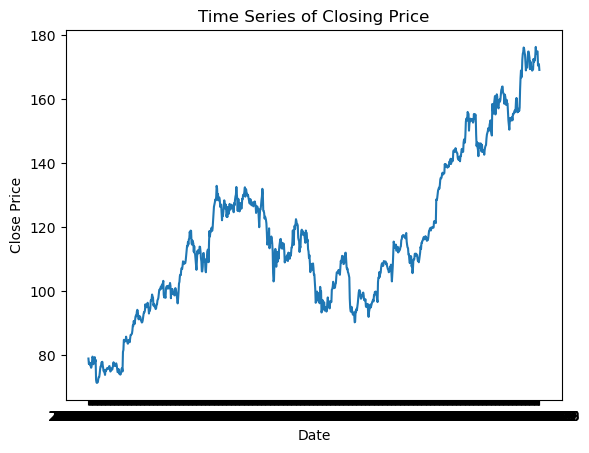

In [11]:
plt.figure()
plt.plot(ts)
plt.title("Time Series of Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

## Time Series Decomposition

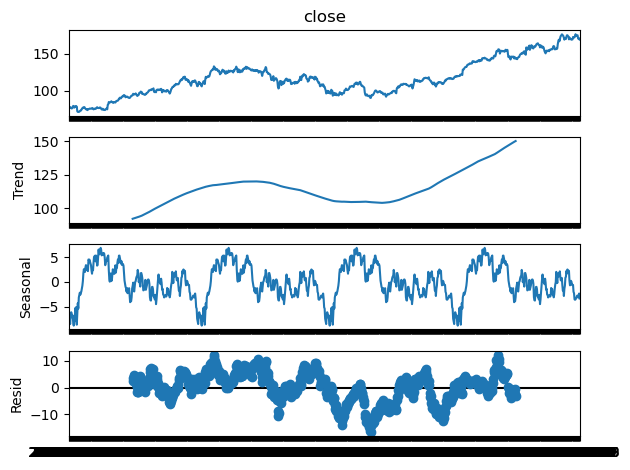

In [12]:
decomposition = seasonal_decompose(ts, model='additive', period=252)

decomposition.plot()
plt.show()

## Moving Average Smoothing

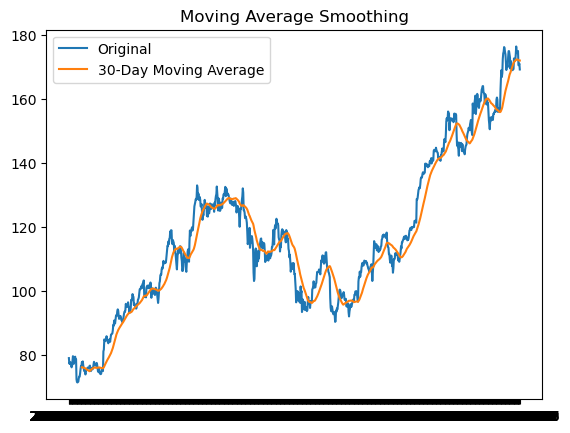

In [13]:
ts_ma = ts.rolling(window=30).mean()

plt.figure()
plt.plot(ts, label='Original')
plt.plot(ts_ma, label='30-Day Moving Average')
plt.legend()
plt.title("Moving Average Smoothing")
plt.show()

# Task 3: Clustering Analysis (K Means)

In [22]:
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
df = df.dropna(subset=["open", "high", "low", "close", "volume"])

In [24]:
X = df[["open", "high", "low", "close", "volume"]]

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Elbow Method (Optimal K)

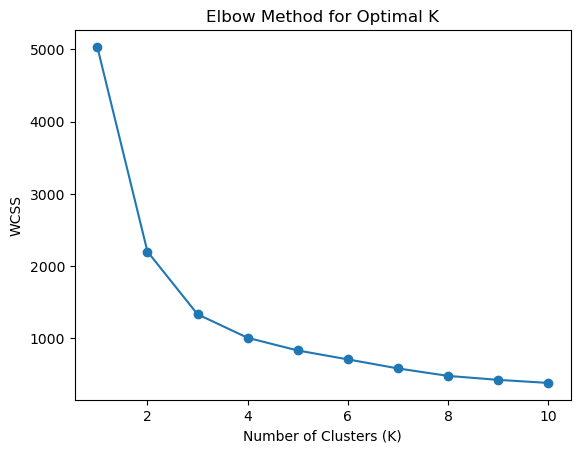

In [26]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


## Apply K-Means (Example: K = 3)

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = clusters

## Cluster Visualization (2D Scatter Plot)

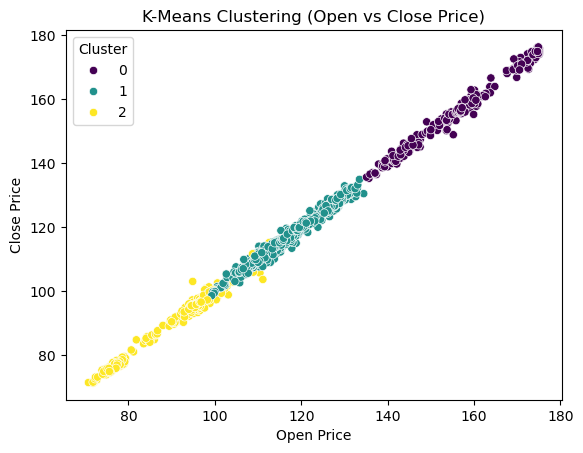

In [28]:
plt.figure()
sns.scatterplot(
    x=df["open"],
    y=df["close"],
    hue=df["Cluster"],
    palette="viridis"
)

plt.title("K-Means Clustering (Open vs Close Price)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()
